# Understanding Logistic Regression with Python

Classification techniques are an essential part of machine learning and data mining applications. Approximately 70% of problems in Data Science are classification problems. There are lots of classification problems that are available, but the logistics regression is common and is a useful regression method for solving the binary classification problem. Another category of classification is Multinomial classification, which handles the issues where multiple classes are present in the target variable. For example, IRIS dataset a very famous example of multi-class classification. Other examples are classifying article/blog/document category.

Logistic Regression can be used for various classification problems such as spam detection. Diabetes prediction, if a given customer will purchase a particular product or will they churn another competitor, whether the user will click on a given advertisement link or not, and many more examples are in the bucket.

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem. Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.

In this tutorial, you will learn the following things in Logistic Regression:

- Introduction to Logistic Regression
- Linear Regression Vs. Logistic Regression
- Maximum Likelihood Estimation Vs. Ordinary Least Square Method
- How do Logistic Regression works?
- Model building in Scikit-learn
- Model Evaluation using Confusion Matrix.
- Advantages and Disadvantages of Logistic Regression

## Intro to Logistic Regression

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

Linear Regression Equation:

<img src = "http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image1_ga8gze.png" />

Where, y is dependent variable and x1, x2 ... and Xn are explanatory variables.

Sigmoid Function:

<img src = "http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image2_kwxquj.png" />


Apply Sigmoid function on linear regression:

<img src = "http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image3_qldafx.png"/>


Properties of Logistic Regression:

- The dependent variable in logistic regression follows Bernoulli Distribution.
- Estimation is done through maximum likelihood.
- No R Square, Model fitness is calculated through Concordance, KS-Statistics.


## Linear Regression vs. Logistic Regression

Linear regression gives you a continuous output, but logistic regression provides a constant output. An example of the continuous output is house price and stock price. Example's of the discrete output is predicting whether a patient has cancer or not, predicting whether the customer will churn. Linear regression is estimated using `Ordinary Least Squares (OLS)` while logistic regression is estimated using `Maximum Likelihood Estimation (MLE)` approach.

<img src= "http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png"/>

## Maximum Likelihood Estimation vs. Least Square Method

The MLE is a "likelihood" maximization method, while OLS is a distance-minimizing approximation method. Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.

Ordinary Least squares estimates are computed by fitting a regression line on given data points that has the minimum sum of the squared deviations (least square error). Both are used to estimate the parameters of a linear regression model. MLE assumes a joint probability mass function, while OLS doesn't require any stochastic assumptions for minimizing distance.

## Sigmoid Function

The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. The outputcannotFor example: If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that patient will suffer from cancer.
<img src='http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image4_gw5mmv.png'/>
<img src='http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/sigmoid2_lv4c7i.png'/>

## Types of Logistic Regression

Types of Logistic Regression:

- Binary Logistic Regression: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.
- Multinomial Logistic Regression: The target variable has three or more nominal categories such as predicting the type of Wine.
- Ordinal Logistic Regression: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

## Model building in Scikit-learn

Let's build the diabetes prediction model.

Here, you are going to predict diabetes using Logistic Regression Classifier.

Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function. You can download data from [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [1]:
# Your data file is in ./data/diabetes.csv

#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv('./data/diabetes.csv', header=0)
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Selecting Feature

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).



In [2]:
pima.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [3]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

## Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [6]:
# split X and y into training and testing sets - ALWAYS SPLIT X & Y FIRST

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

## Model Development and Prediction

First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using `predict()`.

In [9]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

## Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.



In [10]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[116,  12],
       [ 31,  33]])

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2x2 because this model is binary classification. You have two classes `0 and 1`. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

## Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using **Heatmap**.

In [11]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

Text(0.5, 257.44, 'Predicted label')

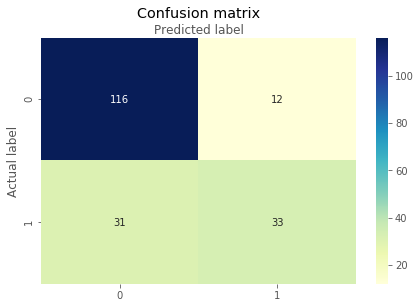

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Confusion Matrix Evaluation Metrics
Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.


In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7760416666666666
Precision: 0.7333333333333333
Recall: 0.515625


Well, you got a classification rate of 80%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 76% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 58% of the time.

## ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

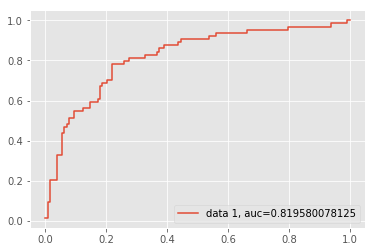

In [14]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Advantages
Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

### Disadvantages
Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

## Conclusion
In this tutorial, you covered a lot of details about Logistic Regression. You have learned what the logistic regression is, how to build respective models, how to visualize results and some of the theoretical background information. Also, you covered some basic concepts such as the sigmoid function, maximum likelihood, confusion matrix, ROC curve.

Hopefully, you can now utilize the Logistic Regression technique to analyze your own datasets. Thanks for reading this tutorial!